In [10]:
import pandas as pd
import numpy as np
import glob

In [11]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [12]:
video = pd.read_csv('/content/drive/Shareddrives/想聊對不隊/Code/CSV/all_video_result.csv', index_col=0, usecols=range(30721))
# video

In [13]:
audio = pd.read_csv('/content/drive/Shareddrives/想聊對不隊/Code/CSV/all_audio_result.csv', index_col=0, usecols=range(188))
# audio

In [ ]:
facial_feature = pd.read_csv('/content/drive/Shareddrives/想聊對不隊/Code/CSV/all_facial_feature_result.csv')
# facial_feature

In [14]:
pickle1 = pd.read_pickle("/content/drive/Shareddrives/想聊對不隊/Code/answer/annotation_validation (1).pkl")
pickle1_df = pd.DataFrame.from_dict(pickle1)
pickle2 = pd.read_pickle("/content/drive/Shareddrives/想聊對不隊/Code/answer/annotation_training (2).pkl")
pickle2_df = pd.DataFrame.from_dict(pickle2)
pickle_df = pickle1_df.append(pickle2_df)
pickle_df.index = pickle_df.index.to_series().str.replace('mp4', 'npy')
pickle_df

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness
modNfUPt3F4.002.npy,0.644860,0.593750,0.615385,0.640777,0.616822,0.555556
h6LOjpCRXtY.005.npy,0.439252,0.520833,0.417582,0.572816,0.439252,0.411111
WER4ww680QQ.004.npy,0.457944,0.312500,0.428571,0.398058,0.373832,0.555556
c4XnKouozXU.002.npy,0.364486,0.572917,0.527473,0.553398,0.523364,0.322222
OEKg-Tvwcbk.002.npy,0.345794,0.468750,0.516484,0.417476,0.383178,0.477778
...,...,...,...,...,...,...
Eh7WRYXVh9M.000.npy,0.523364,0.479167,0.626374,0.621359,0.588785,0.544444
2q8orkMs2Jg.003.npy,0.728972,0.760417,0.582418,0.524272,0.616822,0.822222
F1lAPYh4t3U.000.npy,0.700935,0.770833,0.747253,0.699029,0.691589,0.788889
cxJ0u6r0-pU.001.npy,0.317757,0.531250,0.582418,0.679612,0.616822,0.588889


In [15]:
df = pd.merge(video, audio, on='index', how="outer")
# df = pd.merge(df, facial_feature, on='index', how="outer")
df = pd.merge(df, pickle_df, left_on='index', right_index=True, how="outer")
df = df.drop(['interview'], axis=1)
df = df.set_index('index')
df = df.dropna()
# df

In [8]:
# df.to_csv('/content/drive/Shareddrives/想聊對不隊/Code/CSV/result.csv')
df.to_csv('/content/drive/Shareddrives/想聊對不隊/Code/CSV/result_no_facial_feature.csv')



---


---



In [3]:
# df = pd.read_csv('/content/drive/Shareddrives/想聊對不隊/Code/CSV/result.csv', index_col=0)
df = pd.read_csv('/content/drive/Shareddrives/想聊對不隊/Code/CSV/result_no_facial_feature.csv', index_col=0)

In [9]:
from keras.utils import np_utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import  SGD,Adam,RMSprop
from keras import initializers
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
X = np.asarray(df.drop(['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness'], axis=1))
y = np.asarray(df[['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']])
x_train, x_test = train_test_split(X, test_size=0.3, random_state=200)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=200)

In [ ]:
#建立模型
model = Sequential()
#將模型疊起 (try different units values; try adding more layers)
#relu vs. sigmoid
model.add(Dense(input_dim=30917,units=1000,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=5,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              30918000  
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 300)               300300    
                                                                 
 dropout_7 (Dropout)         (None, 300)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#categorical_crossentropy vs. mse for loss
#adam vs. SGD(lr=0.1) for optimizer
model.compile(loss='mse',optimizer=SGD(lr=0.8),metrics=['mse'])
#try different batch_size 500 vs. 100
history = model.fit(x_train,y_train,batch_size=500,epochs=100)
#顯示訓練結果
score = model.evaluate(x_train,y_train)
print('\nTrain Acc:', score[1])
result = model.evaluate(x_test,y_test)
print('\nTest Acc:', result[1])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
6/6 [==============================] - 8s 1s/step - loss: 0.2427 - mse: 0.2427
Epoch 2/100
6/6 [==============================] - 6s 938ms/step - loss: 0.2427 - mse: 0.2427
Epoch 3/100
6/6 [==============================] - 6s 936ms/step - loss: 0.2427 - mse: 0.2427
Epoch 4/100
6/6 [==============================] - 6s 948ms/step - loss: 0.2427 - mse: 0.2427
Epoch 5/100
6/6 [==============================] - 6s 945ms/step - loss: 0.2427 - mse: 0.2427
Epoch 6/100
2/6 [=========>....................] - ETA: 5s - loss: 0.2442 - mse: 0.2442

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [ ]:
plt.plot(history.history['loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  



---



---



In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle
linear = LinearRegression(normalize=True)
linear.fit(x_train,y_train)
pred = linear.predict(x_test)
with open("/content/drive/Shareddrives/想聊對不隊/Code/Coding/LR_no_facial_feature.pkl", "wb") as f:
  pickle.dump(linear, f)
print('\ny0:')
print("R2 score",r2_score(y_test[:,0], pred[:,0]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,0], pred[:,0])))

print('\ny1:')
print("R2 score",r2_score(y_test[:,1], pred[:,1]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,1], pred[:,1])))

print('\ny2:')
print("R2 score",r2_score(y_test[:,2], pred[:,2]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,2], pred[:,2])))

print('\ny3:')
print("R2 score",r2_score(y_test[:,3], pred[:,3]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,3], pred[:,3])))

print('\ny4:')
print("R2 score",r2_score(y_test[:,4], pred[:,4]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,4], pred[:,4])))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,



y0:
R2 score -0.13501673179896123
RMSE 0.16144606271514506

y1:
R2 score -0.1615089672743042
RMSE 0.1649901237178044

y2:
R2 score -0.4808797243549112
RMSE 0.16382370776978977

y3:
R2 score 0.06723078485656175
RMSE 0.15101914965021826

y4:
R2 score -0.23702458555140038
RMSE 0.1614059734285151


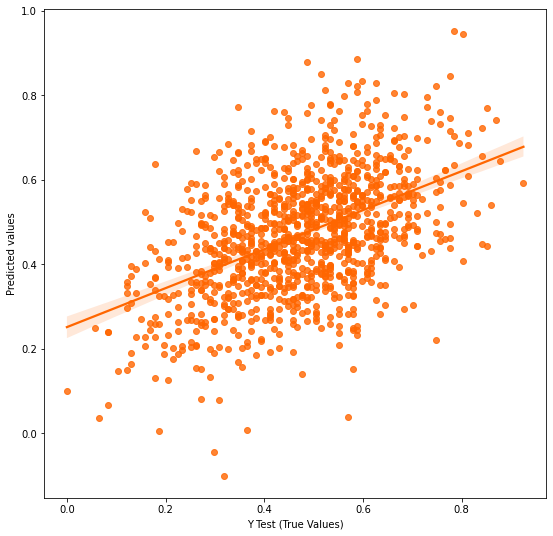

In [ ]:
# Recover default matplotlib settings
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x = y_test[:,0],y = pred[:,0], color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score",r2_score(y_test[:,0], pred[:,0]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,0], pred[:,0])))

R2 score -0.01976067183143959
RMSE 0.15115773418478506


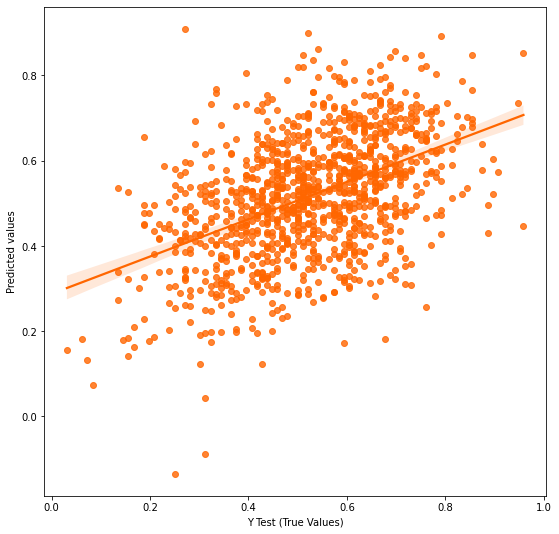

In [ ]:
# Recover default matplotlib settings
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x = y_test[:,1],y = pred[:,1], color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [ ]:
print("R2 score",r2_score(y_test[:,1], pred[:,1]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,1], pred[:,1])))

R2 score -0.010108775329946473
RMSE 0.15453056072344404


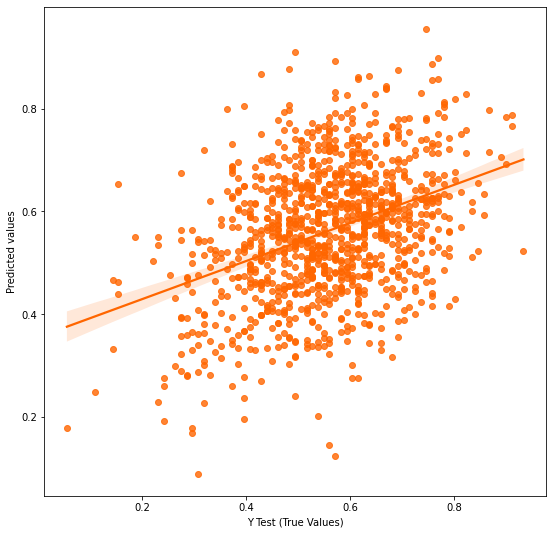

In [ ]:
# Recover default matplotlib settings
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x = y_test[:,2],y = pred[:,2], color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [ ]:
print("R2 score",r2_score(y_test[:,2], pred[:,2]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,2], pred[:,2])))

R2 score -0.22021353385632159
RMSE 0.14632127456579658


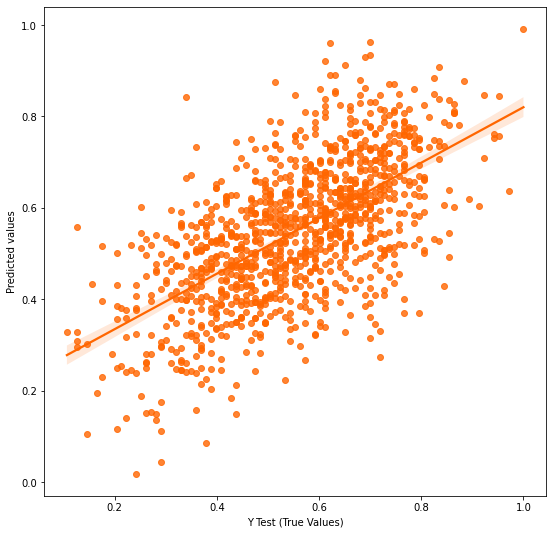

In [ ]:
# Recover default matplotlib settings
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x = y_test[:,3],y = pred[:,3], color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [ ]:
print("R2 score",r2_score(y_test[:,3], pred[:,3]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,3], pred[:,3])))

R2 score 0.26428083371018896
RMSE 0.13600166478137043


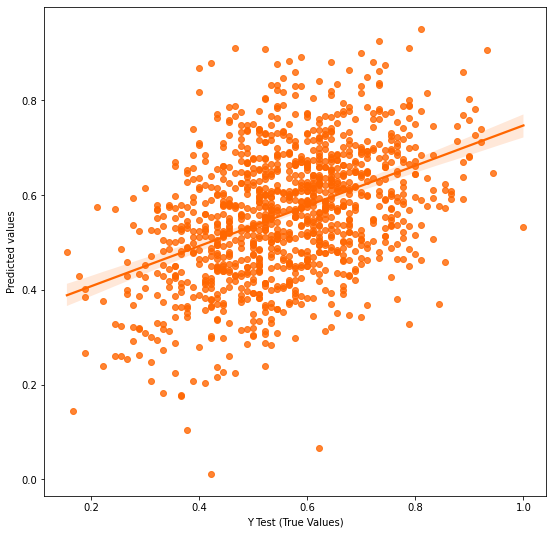

In [ ]:
# Recover default matplotlib settings
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x = y_test[:,4],y = pred[:,4], color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [ ]:
print("R2 score",r2_score(y_test[:,4], pred[:,4]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,4], pred[:,4])))

R2 score -0.1395196886995378
RMSE 0.14870920242199173


In [ ]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)


print('\ny0:')
print("R2 score",r2_score(y_test[:,0], pred[:,0]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,0], pred[:,0])))

print('\ny1:')
print("R2 score",r2_score(y_test[:,1], pred[:,1]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,1], pred[:,1])))

print('\ny2:')
print("R2 score",r2_score(y_test[:,2], pred[:,2]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,2], pred[:,2])))

print('\ny3:')
print("R2 score",r2_score(y_test[:,3], pred[:,3]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,3], pred[:,3])))

print('\ny4:')
print("R2 score",r2_score(y_test[:,4], pred[:,4]))
print("RMSE",np.sqrt(mean_squared_error(y_test[:,4], pred[:,4])))

[08:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

y0:


IndexError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(x_train, y_train)
    scores.append(rf.score(x_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)